# 📧 Email Campaign Optimization: Analysis Notebook


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/sample_email_campaign_data.csv")
df.head()

,campaign_id,send_time,subject_line,preview_text,personalized,audience_segment,sent,delivered,open_count,click_count
0,CAMPAIGN_1,2024-01-01 00:00:00,This allow fall rise.,Central best need western deep enough into tec...,0,International,4491,4424,1548,174
1,CAMPAIGN_2,2024-01-01 12:00:00,Catch knowledge adult price help six how.,Enough here man gas structure employee until n...,1,Transfer,2148,2091,938,48
2,CAMPAIGN_3,2024-01-02 00:00:00,Case measure television data door air.,Call recently station million forget bring loo...,0,International,1945,1871,1218,124
3,CAMPAIGN_4,2024-01-02 12:00:00,Admit style know how research food.,Even paper certainly yourself three party fami...,0,Undergrad,4699,4671,699,183
4,CAMPAIGN_5,2024-01-03 00:00:00,Serve result he spring have protect many.,Rise politics join organization to hope yard a...,0,Transfer,4423,4388,2746,886


In [9]:
# Convert send_time to datetime
df['send_time'] = pd.to_datetime(df['send_time'])

# Feature engineering
df['hour_sent'] = df['send_time'].dt.hour
df['day_of_week'] = df['send_time'].dt.day_name()
df['subject_line_length'] = df['subject_line'].apply(lambda x: len(str(x)))
df['open_rate'] = df['open_count'] / df['delivered']
df['ctr'] = df['click_count'] / df['open_count']

df.describe()

,send_time,personalized,sent,delivered,open_count,click_count,hour_sent,subject_line_length,open_rate,ctr
count,200,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000
mean,2024-02-19 18:00:00,0.500000,2816.725000,2768.370000,1118.985000,319.660000,6.000000,36.79500,0.403376,0.284208
min,2024-01-01 00:00:00,0.000000,504.000000,414.000000,62.000000,13.000000,0.000000,16.00000,0.101372,0.051173
25%,2024-01-25 21:00:00,0.000000,1624.500000,1578.250000,555.000000,116.750000,0.000000,27.00000,0.275053,0.187793
50%,2024-02-19 18:00:00,0.500000,2982.000000,2924.500000,971.500000,238.000000,6.000000,38.00000,0.420494,0.291430
75%,2024-03-15 15:00:00,1.000000,3860.250000,3818.500000,1617.000000,407.500000,12.000000,44.00000,0.541827,0.388708
max,2024-04-09 12:00:00,1.000000,4996.000000,4971.000000,3201.000000,1261.000000,12.000000,71.00000,0.698212,0.498697
std,NaN,0.501255,1297.602869,1297.698068,734.643964,273.545168,6.015056,11.03275,0.168583,0.123054


## 📊 Exploratory Data Analysis

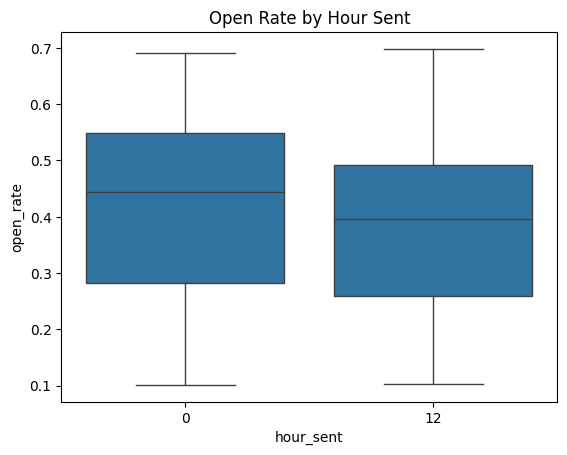

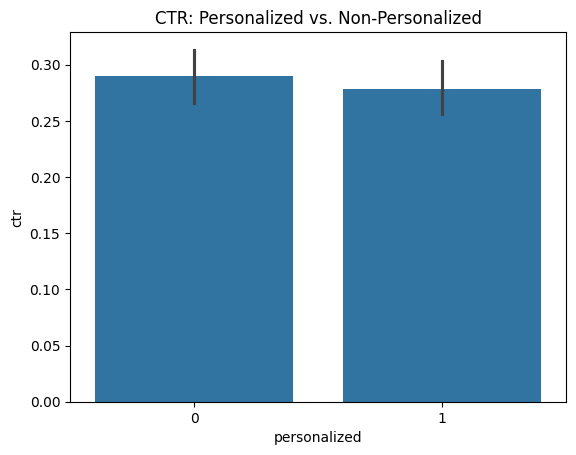

In [10]:
# Open rate by hour
sns.boxplot(x='hour_sent', y='open_rate', data=df)
plt.title("Open Rate by Hour Sent")
plt.show()

# CTR by personalization
sns.barplot(x='personalized', y='ctr', data=df)
plt.title("CTR: Personalized vs. Non-Personalized")
plt.show()

## 🧪 Hypothesis Test: Does Personalization Increase CTR?

In [11]:
personalized = df[df['personalized'] == 1]['ctr']
non_personalized = df[df['personalized'] == 0]['ctr']

t_stat, p_value = ttest_ind(personalized, non_personalized)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")

T-statistic: -0.685, P-value: 0.494


## 🤖 Predicting Open Rates (Optional)

In [12]:
features = df[['hour_sent', 'personalized', 'subject_line_length']]
target = df['open_rate']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

print("Model R² Score on Test Set:", model.score(X_test, y_test))

Model R² Score on Test Set: -0.40199373611456735
